### 01. Accounting for overfitting of the model
- According to the results of trial 01, the model was overfitting to a certain degree. 
- Data augmentation is considered to help the model generalize to a better degree. 

### 02. Finding the optimal number of epochs
- Learning curves to visualize the accuracy/error of the model with each epoch.
- Cross-validation to evaluate the model performance across different subsets of data to ensure proper generalization.
- Early stopping to monitor the model performance on validation set durring training and stop training when the performance stops improving. 

In [8]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import LabelEncoder

# Function to load images and labels
def load_images_with_labels(data_folder):
    images = []
    labels = []
    for label in os.listdir(data_folder):
        folder_path = os.path.join(data_folder, label)
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                img_path = os.path.join(folder_path, filename)
                if os.path.isfile(img_path) and img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                    img = Image.open(img_path).convert('L')  # Convert to grayscale
                    img = img.resize((80, 80))  # Resize to 80x80
                    images.append(np.array(img))
                    labels.append(label)
    return np.array(images), np.array(labels)

print("Check Point 00: start importing and preping data:")

# Define the path to your data folder
train_data_folder = 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train'
validation_data_folder = 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/valid'
test_data_folder = 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/test'

# Load the data
training_images, training_labels = load_images_with_labels(train_data_folder)
validation_images, validation_labels = load_images_with_labels(validation_data_folder)
test_images, test_labels = load_images_with_labels(test_data_folder)

# Normalize image data
training_images = training_images / 255.0
validation_images = validation_images / 255.0
test_images = test_images / 255.0

# Encode labels as integers
label_encoder = LabelEncoder()
encoded_training_labels = label_encoder.fit_transform(training_labels)
encoded_validation_labels = label_encoder.transform(validation_labels)
encoded_test_labels = label_encoder.transform(test_labels)

# Reshape image data to add a channel dimension
training_images = np.expand_dims(training_images, axis=-1)
validation_images = np.expand_dims(validation_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Check for NumPy version compatibility
if not hasattr(np, 'complex_'):
    np.complex_ = np.complex128

print("Check Point 01: done preping data:")

# Defining the CNN architecture.
def create_sinhala_letter_id_cnn():
    model = models.Sequential([
        layers.Input(shape=(80, 80, 1)),  # Input layer with specified shape
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(454, activation='softmax')  # Assuming 454 labels.
    ])
    return model

# Create an instance of the CNN.
sinhala_letter_cnn = create_sinhala_letter_id_cnn()

# Compile the model.
sinhala_letter_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary.
sinhala_letter_cnn.summary()

print("Check Point 02: starting the augmentation of data:")

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,          # Randomly rotate images by up to 10 degrees
    width_shift_range=0.1,      # Randomly shift images horizontally by up to 10% of the width
    height_shift_range=0.1,     # Randomly shift images vertically by up to 10% of the height
    shear_range=0.1,            # Randomly shear (slant) images by up to 10%
    zoom_range=0.1,             # Randomly zoom in on images by up to 10%
    horizontal_flip=False,      # Do not flip images horizontally (set to True if you want to enable flipping)
    fill_mode='nearest'         # Set the fill mode to 'nearest' for filling in new pixels created by augmentation
)
datagen.fit(training_images)

print("Check Point 03: done data augmentation:")

# Train the model
history = sinhala_letter_cnn.fit(datagen.flow(training_images, encoded_training_labels, batch_size=32),
                                 epochs=50, validation_data=(validation_images, encoded_validation_labels)
                                 )

print("Check Point 04: done training the model:")

# Save the final trained model
sinhala_letter_cnn.save('./TrainedModels/CNN_trial_2_50e.keras')

# Save the classes
np.save('./TrainedModels/CNN_trial_2_classes_50e.npy', label_encoder.classes_)


Check Point 00: start importing and preping data:
Check Point 01: done preping data:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 78, 78, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     1,048,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 454)            │        29,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,133,894 (4.33 MB)

 Trainable params: 1,133,894 (4.33 MB)

 Non-trainable params: 0 (0.00 B)

Check Point 02: starting the augmentation of data:
Check Point 03: done data augmentation:
Epoch 1/50


c:\Users\cmsmc\Desktop\Projects\SinhalaTranslator\Work\code\CNN\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2724/2724 ━━━━━━━━━━━━━━━━━━━━ 507s 181ms/step - accuracy: 0.0227 - loss: 5.5590 - val_accuracy: 0.1720 - val_loss: 3.4439
Epoch 2/50
2724/2724 ━━━━━━━━━━━━━━━━━━━━ 478s 175ms/step - accuracy: 0.1861 - loss: 3.3838 - val_accuracy: 0.3596 - val_loss: 2.3717
Epoch 3/50
2724/2724 ━━━━━━━━━━━━━━━━━━━━ 486s 178ms/step - accuracy: 0.3179 - loss: 2.5907 - val_accuracy: 0.4395 - val_loss: 2.0284
Epoch 4/50
2724/2724 ━━━━━━━━━━━━━━━━━━━━ 465s 170ms/step - accuracy: 0.3862 - loss: 2.2573 - val_accuracy: 0.4945 - val_loss: 1.8018
Epoch 5/50
2724/2724 ━━━━━━━━━━━━━━━━━━━━ 464s 170ms/step - accuracy: 0.4280 - loss: 2.0556 - val_accuracy: 0.5189 - val_loss: 1.6857
Epoch 6/50
2724/2724 ━━━━━━━━━━━━━━━━━━━━ 470s 172ms/step - accuracy: 0.4675 - loss: 1.9152 - val_accuracy: 0.5523 - val_loss: 1.5370
Epoch 7/50
2724/2724 ━━━━━━━━━━━━━━━━━━━━ 475s 174ms/step - accuracy: 0.4948 - loss: 1.7778 - val_accuracy: 0.5876 - val_loss: 1.4379
Epoch 8/50
2724/2724 ━━━━━━━━━━━━━━━━━━━━ 467s 171ms/step - accuracy: 0.5

### Visualizing the learning curves

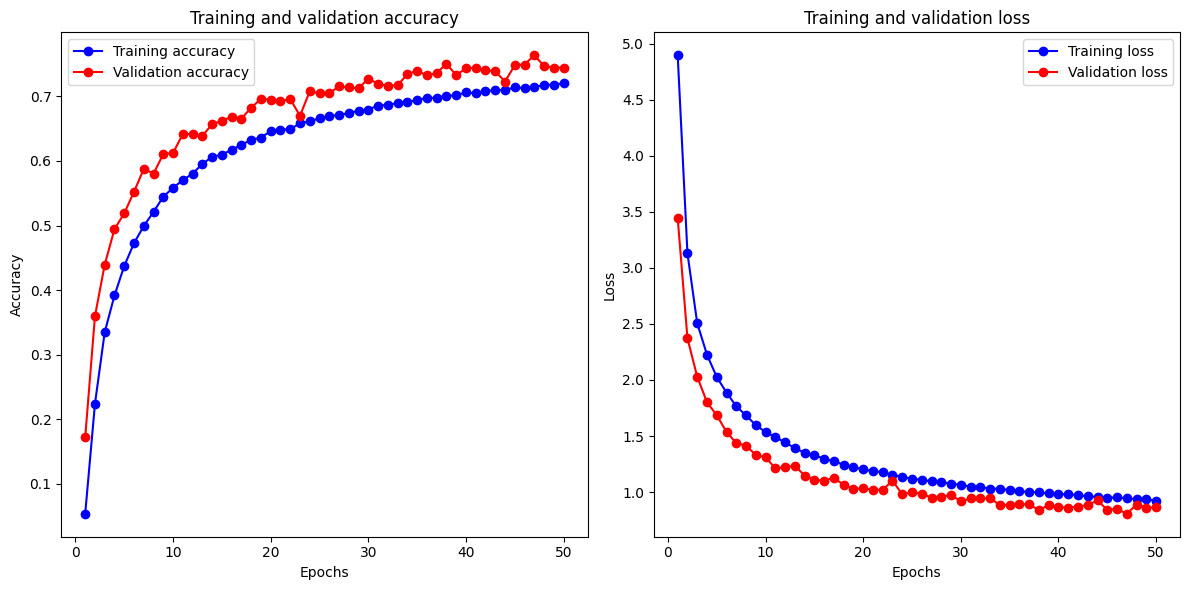

In [9]:
import matplotlib.pyplot as plt

# function to plot training and validation metrics
def plot_metrics(history):

    # Extracting values from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Number of epochs
    epochs = range(1, len(acc) + 1)

    # Plotting training and validation accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Assuming you have already trained your model and have the history object
plot_metrics(history)    

### Early stopping and checkpointing

In [10]:
# Early stopping and model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('./TrainedModels/best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model
history_earlystopping = sinhala_letter_cnn.fit(datagen.flow(training_images, encoded_training_labels, batch_size=32),
                                 epochs=50, validation_data=(validation_images, encoded_validation_labels),
                                 callbacks=[early_stopping, checkpoint])

# Save the final trained model
sinhala_letter_cnn.save('./TrainedModels/CNN_trial_2_earlystopping_checkpointing_50e.keras')

# Save the classes
np.save('./TrainedModels/CNN_trial_2_earlystopping_checkpointing_classes_50e.npy', label_encoder.classes_)


Epoch 1/50
2724/2724 ━━━━━━━━━━━━━━━━━━━━ 278s 102ms/step - accuracy: 0.7253 - loss: 0.9125 - val_accuracy: 0.7431 - val_loss: 0.8813
Epoch 2/50
2724/2724 ━━━━━━━━━━━━━━━━━━━━ 267s 98ms/step - accuracy: 0.7237 - loss: 0.9225 - val_accuracy: 0.7443 - val_loss: 0.8783
Epoch 3/50
2724/2724 ━━━━━━━━━━━━━━━━━━━━ 284s 104ms/step - accuracy: 0.7246 - loss: 0.9122 - val_accuracy: 0.7672 - val_loss: 0.7807
Epoch 4/50
2724/2724 ━━━━━━━━━━━━━━━━━━━━ 279s 102ms/step - accuracy: 0.7294 - loss: 0.8950 - val_accuracy: 0.7585 - val_loss: 0.7967
Epoch 5/50
2724/2724 ━━━━━━━━━━━━━━━━━━━━ 286s 105ms/step - accuracy: 0.7261 - loss: 0.8978 - val_accuracy: 0.7478 - val_loss: 0.8718
Epoch 6/50
2724/2724 ━━━━━━━━━━━━━━━━━━━━ 295s 108ms/step - accuracy: 0.7308 - loss: 0.8853 - val_accuracy: 0.7591 - val_loss: 0.8251
Epoch 7/50
2724/2724 ━━━━━━━━━━━━━━━━━━━━ 300s 110ms/step - accuracy: 0.7316 - loss: 0.8930 - val_accuracy: 0.7689 - val_loss: 0.7674
Epoch 8/50
2724/2724 ━━━━━━━━━━━━━━━━━━━━ 303s 111ms/step - acc

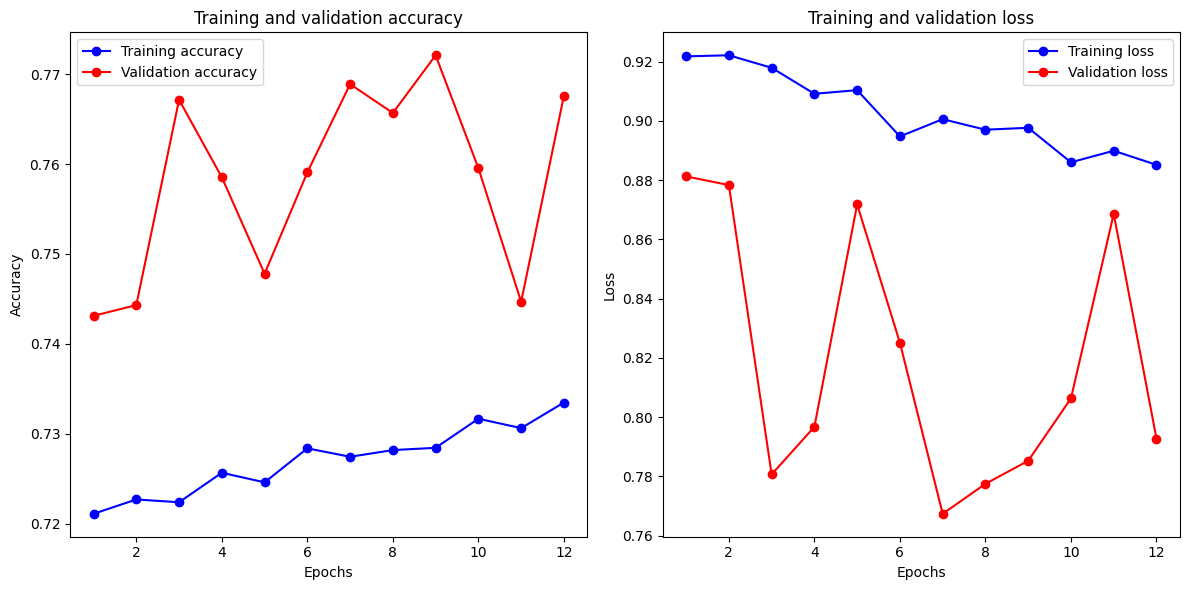

In [11]:
# Assuming you have already trained your model and have the history object
plot_metrics(history_earlystopping)    